In [ ]:
# Hypothesis Testing
# 5: Over time, the share of (contributions made by) female authors stays the same

In [5]:
# >>> Preparation
import pandas

print("Importing publications... ")
cols = [
    'key', 
    'pub_cat',
    'pub_type',
    'title',
    'year',
    'authors',
    'n_authors',
    'n_males',
    'n_females',
    'n_unknown',
    'ratio',
    'n_contribs_females',
    'n_contribs_males',
    'n_contribs_unknown',
]

publs = pandas.read_csv("../_data/publications.csv", usecols=cols)

# Setting index & accessing cells: https://pythonhow.com/accessing-dataframe-columns-rows-and-cells/
publs = publs.set_index("key", drop = False)
print("Publications imported. They look like this: {}".format(publs[:5]))

Importing publications... 


C:\Program_Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Publications imported. They look like this:                                                                  key  \
key                                                                    
books/acm/0082477                                  books/acm/0082477   
books/acm/Kim95                                      books/acm/Kim95   
books/acm/kim95/AnnevelinkACFHK95  books/acm/kim95/AnnevelinkACFHK95   
books/acm/kim95/Blakeley95                books/acm/kim95/Blakeley95   
books/acm/kim95/BreitbartGS95          books/acm/kim95/BreitbartGS95   

                                        pub_cat pub_type  \
key                                                        
books/acm/0082477                          book      NaN   
books/acm/Kim95                            book      NaN   
books/acm/kim95/AnnevelinkACFHK95  incollection      NaN   
books/acm/kim95/Blakeley95         incollection      NaN   
books/acm/kim95/BreitbartGS95      incollection      NaN   

                              

In [6]:
# Calculate necessary sample size
# https://www.wikihow.com/Calculate-Sample-Size
# https://www.qualtrics.com/de/erlebnismanagement/research-core/online-stichproben/?rid=langMatch&prevsite=en&newsite=de&geo=&geomatch=

print("Calculating necessary sample size per year...")

z = 2.58
e = 0.05
d = 0.5

S = (z*z*d*(1-d))/(e*e)

print("Necessary sample size is {}".format(S))

Calculating necessary sample size per year...
Necessary sample size is 665.6399999999999


In [7]:
# Find out the minimum and maximum valid year:

print("Finding min and max years for analysis...")

publs_by_year_group = publs.groupby("year") # Create dataset of publications by year
publs_sum_by_year = publs_by_year_group.count() # Data Set of how many publications by year
min_year = publs_sum_by_year[publs_sum_by_year['key'] > S].index.values.min() #  	1962
max_year = 2018 # To Adjust: We only have 4 months of 2019 with the dataset of April 2019

print("Done. Years {} - {} will be analyzed.".format(min_year, max_year))

Finding min and max years for analysis...
Done. Years 1962 - 2018 will be analyzed.


In [12]:
# Get data: amount of authors by gender summed up by year
print("Calculating amount of authors by gender per year...")

publs_lim = publs[(publs['year'] >= min_year) & (publs['year'] <= max_year)]
publs_lim_grouped = publs_lim.groupby("year").sum()
publs_lim_grouped["year"] = publs_lim_grouped.index.values.tolist()

print("Done. {} years calculated.".format(len(publs_lim_grouped)))

Calculating amount of authors by gender per year...
Done. 57 years calculated.


In [14]:
# Get female share of authors per year
print("Getting share of women and unclassified authors by year... ")
publs_lim_grouped["f_share_authors"] = publs_lim_grouped["n_females"] / publs_lim_grouped["n_authors"] * 100
publs_lim_grouped["u_share_authors"] = publs_lim_grouped["n_unknown"] / publs_lim_grouped["n_authors"] * 100

print("Done! And share of contribs made by women per year...")
#Bonus: Part of contribs by women by year
publs_lim_grouped["f_share_contribs"] = publs_lim_grouped["n_contribs_females"] / (publs_lim_grouped["n_contribs_females"] + publs_lim_grouped["n_contribs_males"] + publs_lim_grouped["n_contribs_unknown"]) * 100

print("Done!")

Getting share of women and unclassified authors by year... 
Done! And share of contribs made by women per year...
Done!


In [15]:
# >>> Calculation
from scipy import stats
print("Calculating Spearman's Correlation Coefficient...")
rho, p = stats.spearmanr(publs_lim_grouped["year"], publs_lim_grouped["f_share_authors"])
print("Done! Rho={}, p={}".format(rho, p))

Calculating Spearman's Correlation Coefficient...
Done! Rho=0.9797770287788437, p=4.0366818192400194e-40


In [16]:
# Test Constraint: Unclassified authors
print("Calculating Spearman's Correlation Coefficient for unclassified authors ...")
rho2, p2 = stats.spearmanr(publs_lim_grouped["year"], publs_lim_grouped["u_share_authors"])
print("Done! Rho={}, p={}".format(rho2, p2))

Calculating Spearman's Correlation Coefficient for unclassified authors ...
Done! Rho=0.8273269380347421, p=2.14923683284596e-15


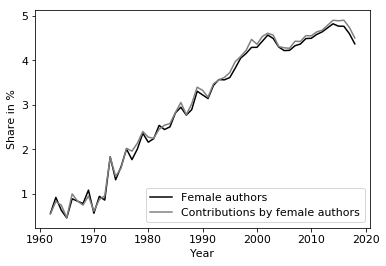

In [18]:
# >>> Visualization
print("Visualizing share of women and their contributions per year...")

import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['pgf.rcfonts'] = False
mpl.rcParams['font.size'] = 11.0

plt.plot(publs_lim_grouped["year"], publs_lim_grouped["f_share_authors"], label="Female authors", color="black")
plt.plot(publs_lim_grouped["year"], publs_lim_grouped["f_share_contribs"], label="Contributions by female authors", color="grey")

plt.xlabel("Year")
plt.ylabel("Share in %")
plt.legend()

plt.savefig('../_graphs/h5/share_women_per_year_2.pdf')
plt.savefig('../_graphs/h5/share_women_per_year_2.pgf')

print("Graph saved at ../_graphs/h5/share_women_per_year_2")

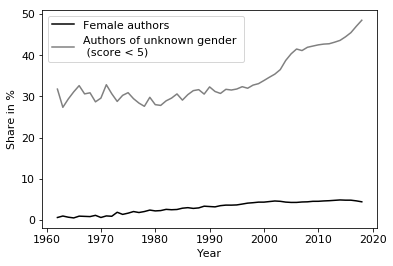

In [19]:
# Test constraint
print("Visualizing share of women and share of unclassified authors per year...")

plt.plot(publs_lim_grouped["year"], publs_lim_grouped["f_share_authors"], label="Female authors", color="black")
plt.plot(publs_lim_grouped["year"], publs_lim_grouped["u_share_authors"], label="Authors of unknown gender \n (score < 5)", color="grey")

plt.xlabel("Year")
plt.ylabel("Share in %")
plt.legend()

plt.savefig('../_graphs/h5/share_women_and_unknown_per_year.pdf')
plt.savefig('../_graphs/h5/share_women_and_unknown_per_year.pgf')

print("Graph saved at ../_graphs/h5/share_women_and_unknown_per_year")

In [ ]:
# >>> Interpretation:
# The hypothesis is rejected. The share of (contributions made by) female authors grows slightly.
# Careful. The amount of unclassified authors grows as well.